In [1]:
import pandas as pd
import sys
from pathlib import Path

# Añadir la raíz del proyecto al path
sys.path.append(str(Path().resolve().parent))
from src.modeling import run_sarimax_gridsearch

# Cargar los datos
df = pd.read_csv("/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/data/raw/AirPassengers.csv", parse_dates=['index'], index_col='index')
series = df['value']

# Ejecutar búsqueda
best_rmse, best_bic, results_df, train, test, forecast,fit_result = run_sarimax_gridsearch(series)

# Ver resultados
print("🔮 Mejor modelo predictivo (por RMSE):")
print(best_rmse)

print("\n📊 Mejor modelo inferencial (por BIC):")
print(best_bic)

/var/folders/c8/43t61clx2xz3_rnm01wl63gm0000gn/T/ipykernel_84099/193280976.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/data/raw/AirPassengers.csv", parse_dates=['index'], index_col='index')
/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/henry/Desktop/Data S

🔮 Mejor modelo predictivo (por RMSE):
order                 (0, 2, 0)
seasonal_order    (1, 1, 0, 12)
rmse                  18.733563
bic                  826.610282
Name: 3, dtype: object

📊 Mejor modelo inferencial (por BIC):
order                 (0, 2, 2)
seasonal_order    (0, 1, 2, 12)
rmse                  45.545644
bic                  641.334598
Name: 20, dtype: object


/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


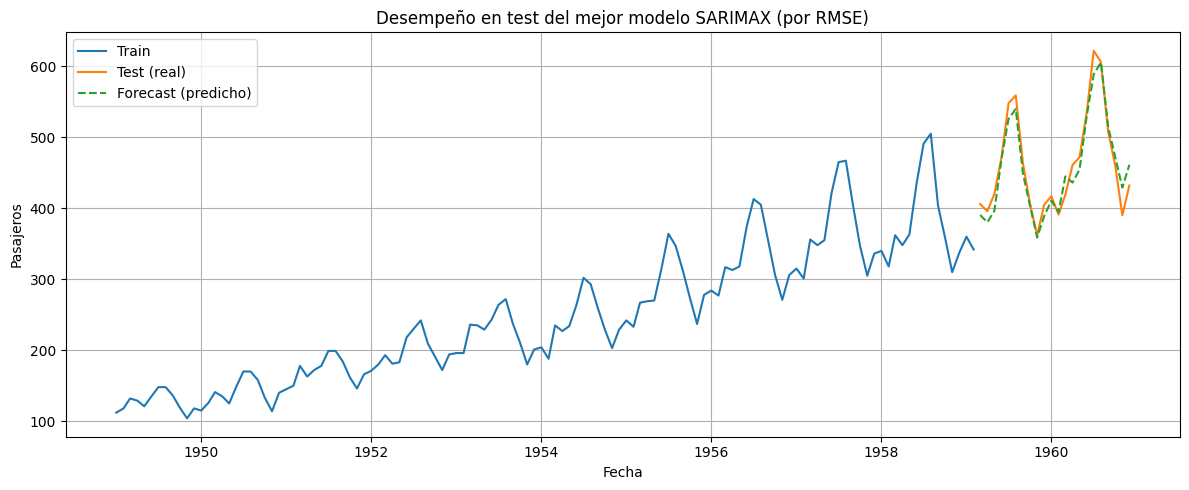


📈 Comparación valores reales vs predichos (primeros 10):
            real    forecast
index                       
1959-03-01   406  390.564686
1959-04-01   396  380.188229
1959-05-01   420  396.176569
1959-06-01   472  469.729596
1959-07-01   548  525.776793
1959-08-01   559  540.012219
1959-09-01   463  448.659080
1959-10-01   407  403.894506
1959-11-01   362  358.706277
1959-12-01   405  388.953362

📉 Error Absoluto Medio (MAE): 15.37


In [2]:
import matplotlib.pyplot as plt

# Comparación visual
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (real)")
plt.plot(test.index, forecast, label="Forecast (predicho)", linestyle="--")
plt.title("Desempeño en test del mejor modelo SARIMAX (por RMSE)")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparación numérica
comparison_df = pd.DataFrame({
    'real': test.values,
    'forecast': forecast.values
}, index=test.index)

print("\n📈 Comparación valores reales vs predichos (primeros 10):")
print(comparison_df.head(10))

# Error absoluto medio
mae = (comparison_df['real'] - comparison_df['forecast']).abs().mean()
print(f"\n📉 Error Absoluto Medio (MAE): {mae:.2f}")

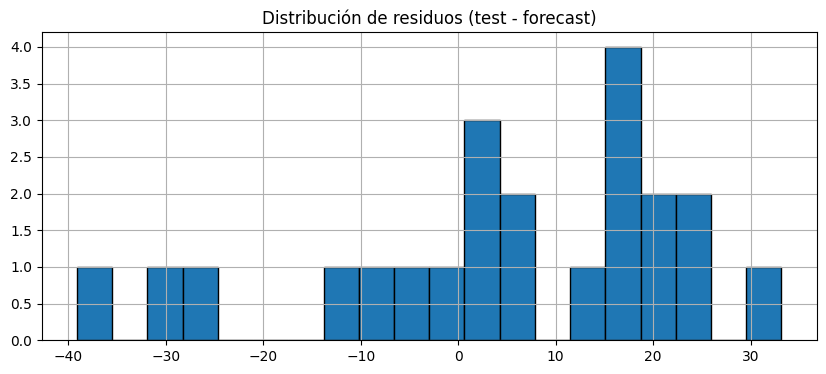

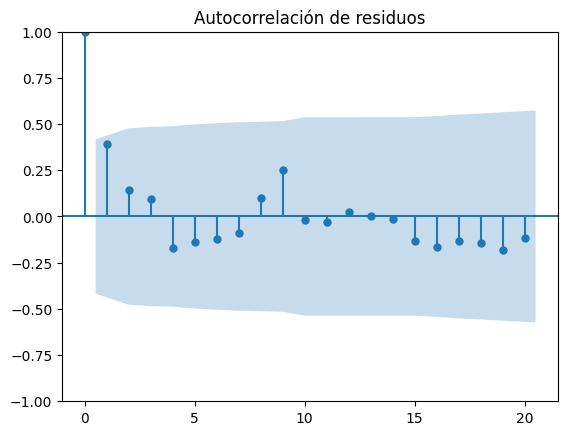

In [9]:
residuals = test - forecast

# Histograma
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Distribución de residuos (test - forecast)")
plt.grid(True)
plt.show()

# ACF de los residuos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20)
plt.title("Autocorrelación de residuos")
plt.show()

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

best_order = best_rmse['order']
best_seasonal = best_rmse['seasonal_order']

# Entrenar con el set completo de entrenamiento
model = SARIMAX(train,
                order=best_order,
                seasonal_order=best_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
fit_result = model.fit(disp=False)

# Ver resumen
print(fit_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  122
Model:             SARIMAX(0, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -408.741
Date:                            Tue, 08 Jul 2025   AIC                            821.482
Time:                                    17:30:12   BIC                            826.610
Sample:                                01-01-1949   HQIC                           823.555
                                     - 02-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1882      0.104     -1.802      0.072      -0.393       0.017
sigma2       292.2344     38.143   

/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Entrenar con toda la serie usando el mejor orden (por RMSE)
final_model = SARIMAX(series,
                      order=best_rmse['order'],
                      seasonal_order=best_rmse['seasonal_order'],
                      enforce_stationarity=False,
                      enforce_invertibility=False)
final_fit = final_model.fit(disp=False)

# Hacer predicciones hacia el futuro (ej: 24 meses)
future_steps = 24
future_forecast = final_fit.forecast(steps=future_steps)

/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/henry/Desktop/Data Science SII/Time Series/time-series-forecasting/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


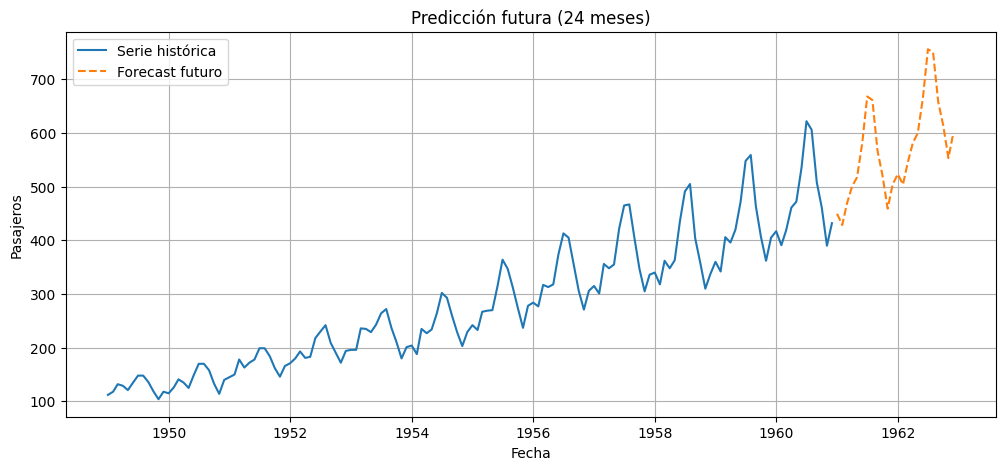

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(series.index, series, label="Serie histórica")
future_index = pd.date_range(start=series.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq="MS")
plt.plot(future_index, future_forecast, label="Forecast futuro", linestyle="--")
plt.title("Predicción futura (24 meses)")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
future_df = pd.DataFrame({
    "date": future_index,
    "forecast": future_forecast.values
})
future_df.to_csv("outputs/future_forecast_best_rmse.csv", index=False)